## Kaggle connection

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# Analyzing Medical Insurance Costs

---
The main purpose of this analysis is to investigate a range of health-related factors and find the most accurate model to predict individual medical costs billed by health insurance. These factors include aspects such as age, gender, body mass index (BMI), number of children, smoking status, and region.

### About data
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance


In [ ]:
!kaggle datasets download -d mirichoi0218/insurance --unzip

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 32.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('insurance.csv')

## Exploratory Data Analysis

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.index.size

1338

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(df.sex.unique())
print(df.smoker.unique())
print(df.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


The data is quite good and there are no missing or incorrect values.

### Socio-demographic data

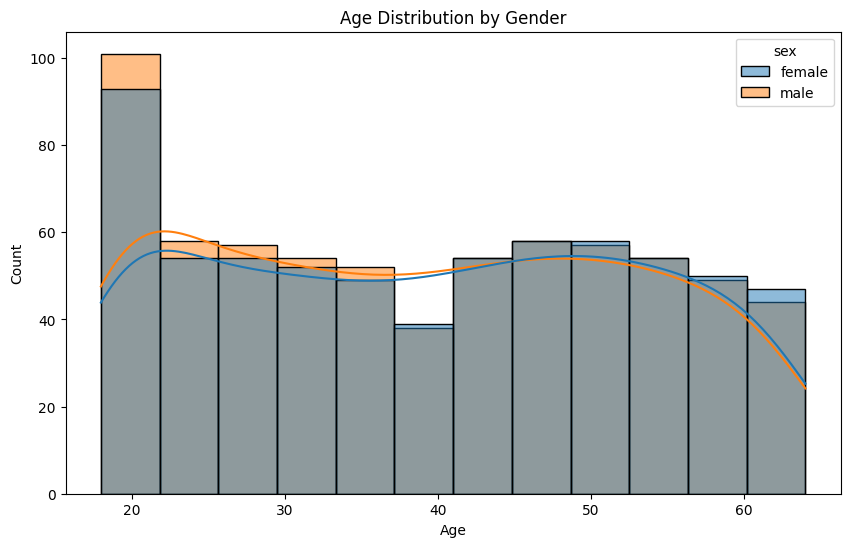

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='sex', kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

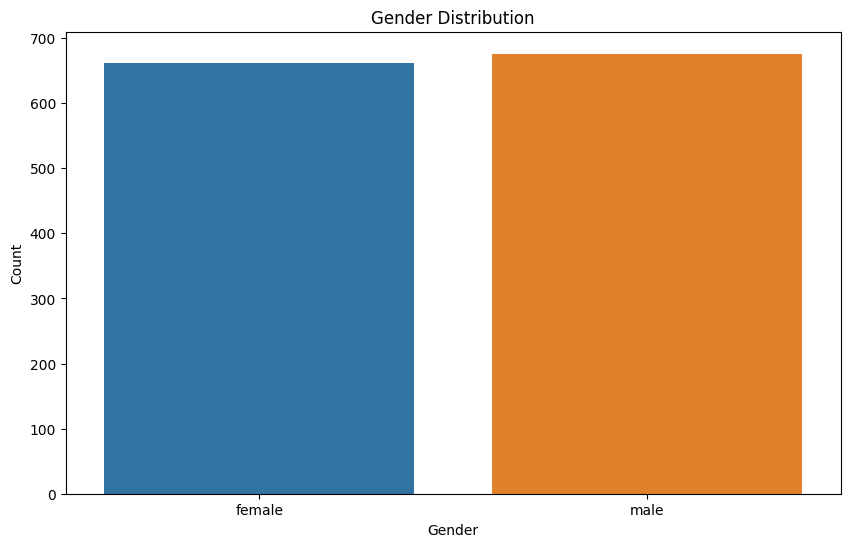

In [ ]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

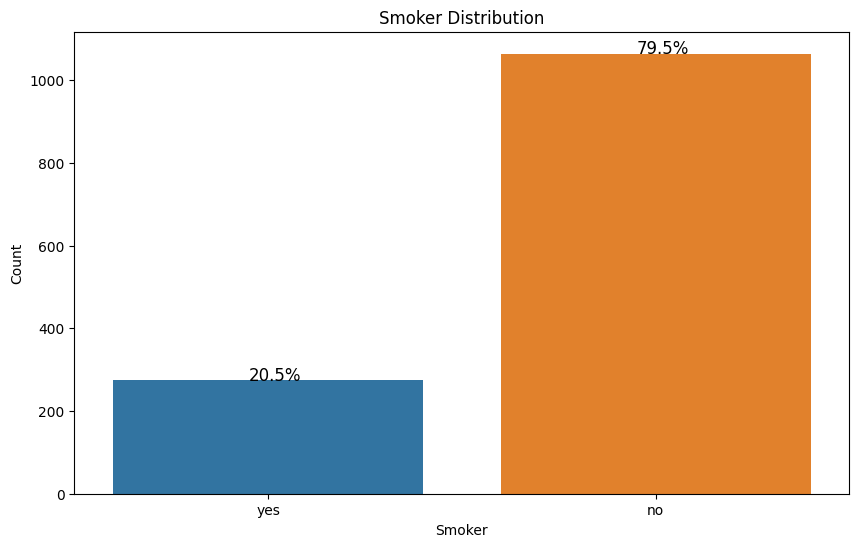

In [ ]:
# Smoker distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='smoker', hue='smoker', data=df)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width() / 2 - 0.05
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y), size = 12)

plt.show()


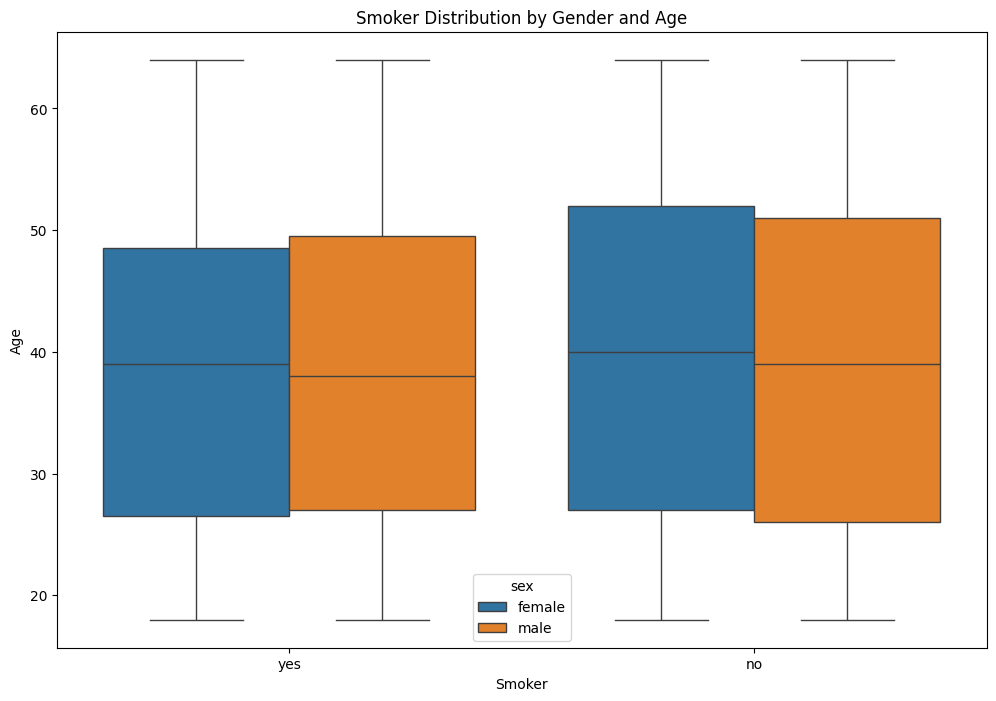

In [ ]:
# Smokers Distribution by Gender and Age
plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker', y='age', data=df, hue='sex')
plt.title('Smokers Distribution by Gender and Age')
plt.xlabel('Smoker')
plt.ylabel('Age')
plt.show()

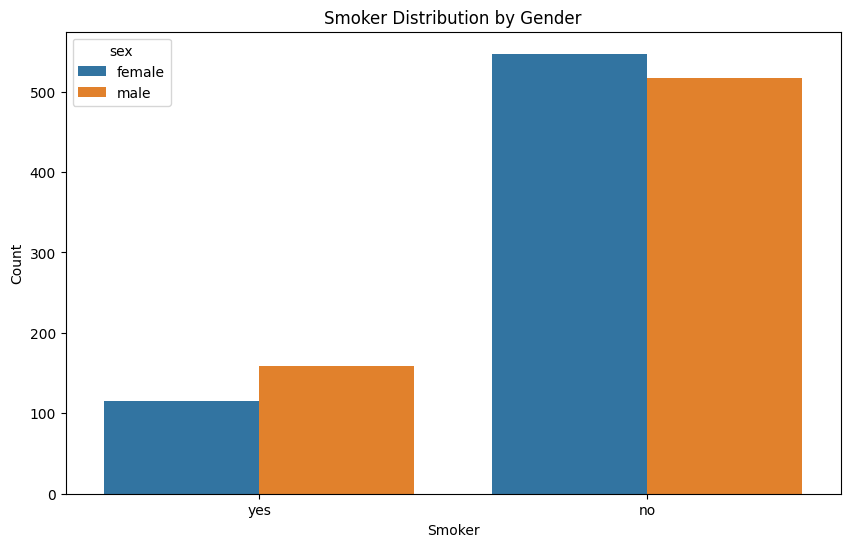

In [ ]:
# Smokers Distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', hue='sex', data=df)
plt.title('Smokers Distribution by Gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


There are more male smokers than female smokers. It can be assumed that the total cost of treatment for men will be higher than for women, given the impact of smoking. This should be checked later.

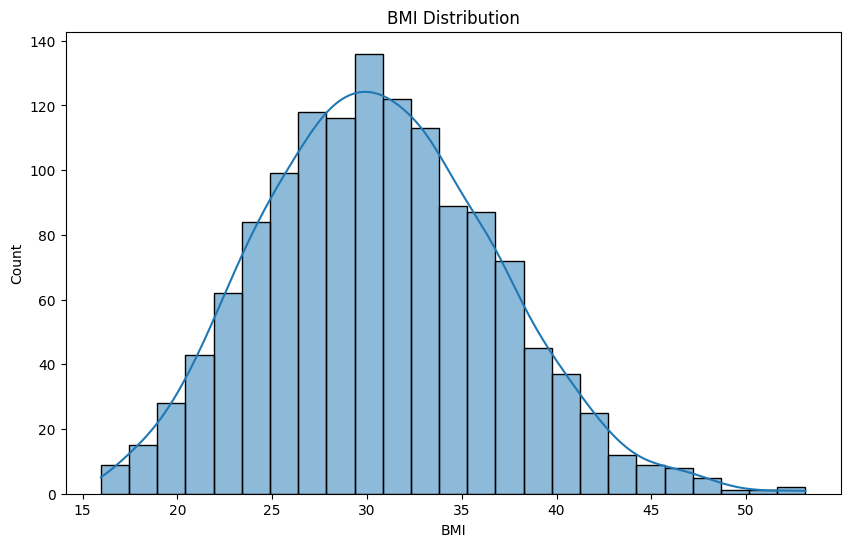

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

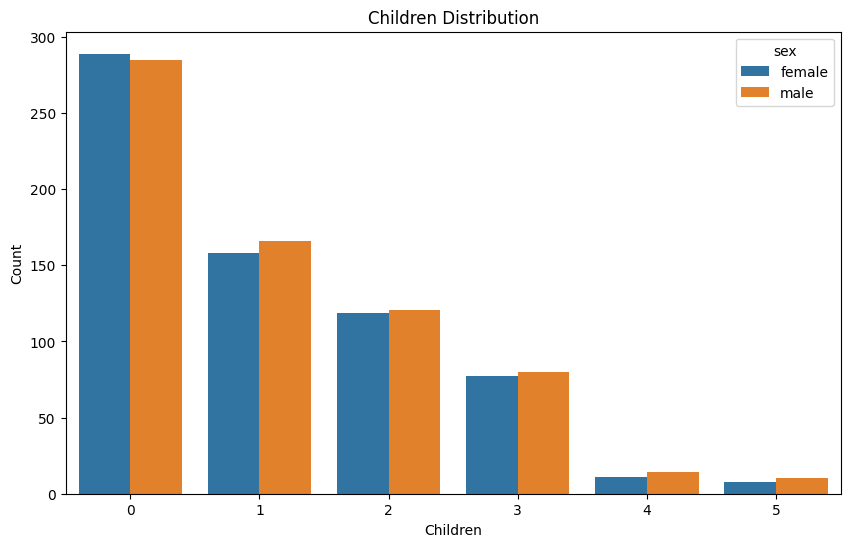

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='children', hue='sex', data=df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

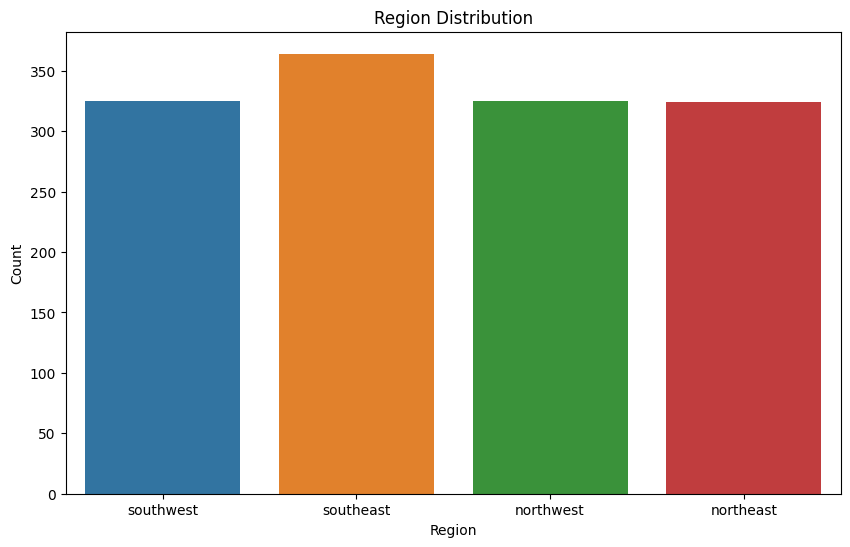

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, hue='region')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

### Relationship between charges and factors

In [ ]:
df_num = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_num.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


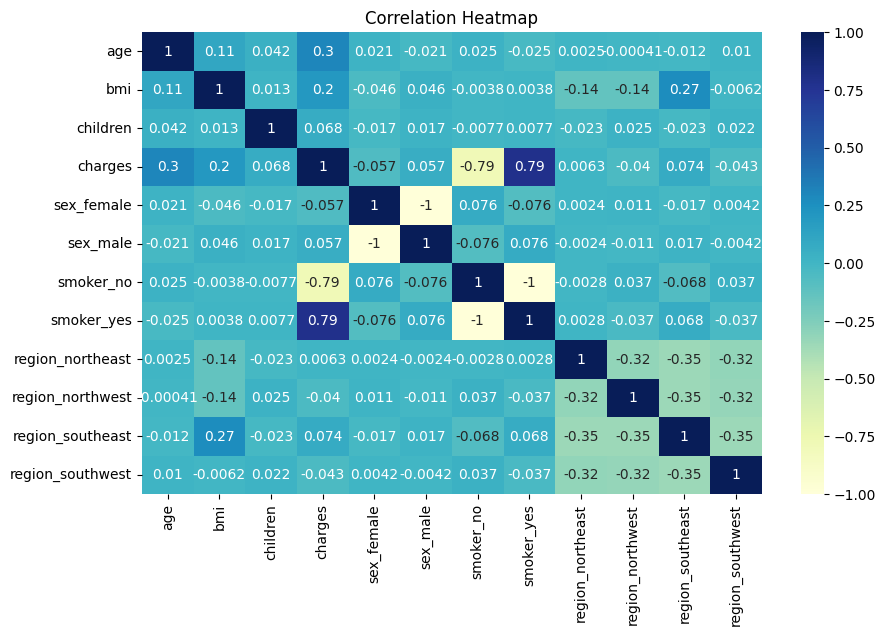

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

As can be seen, the strongest factors correlating with charges are smoking and age. Next, we need to focus on these two factors.

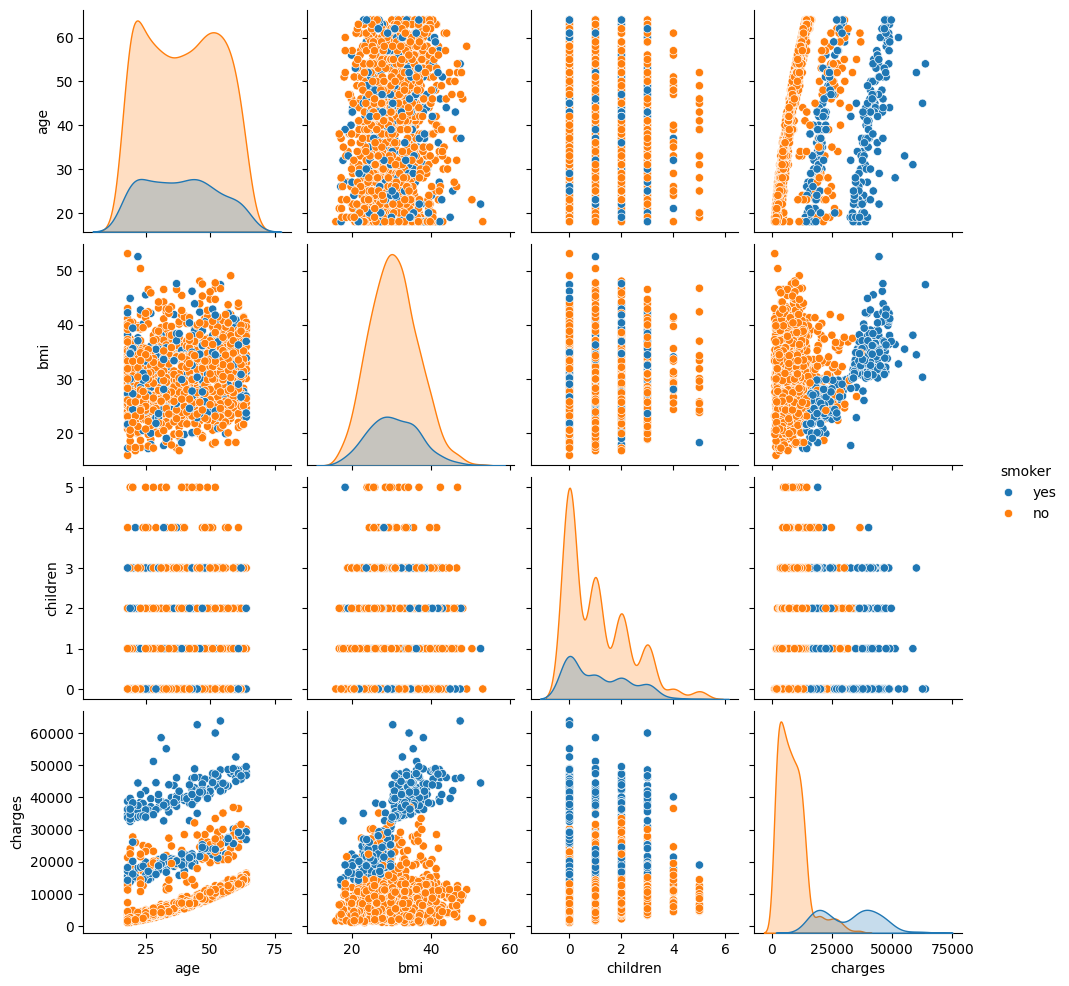

In [ ]:
# Pairplot
sns.pairplot(df, hue="smoker")
plt.show()

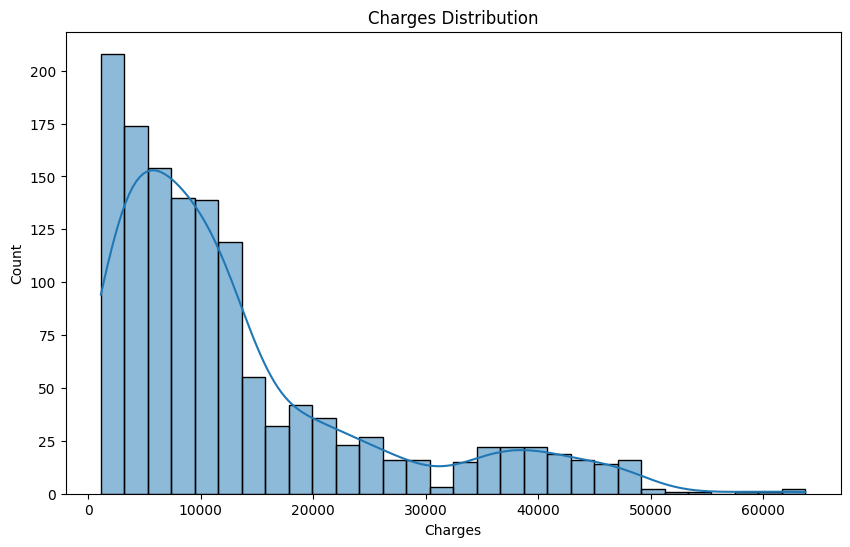

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

The distribution is log-normal and must be transformed with natural log before feeding the data into the model.

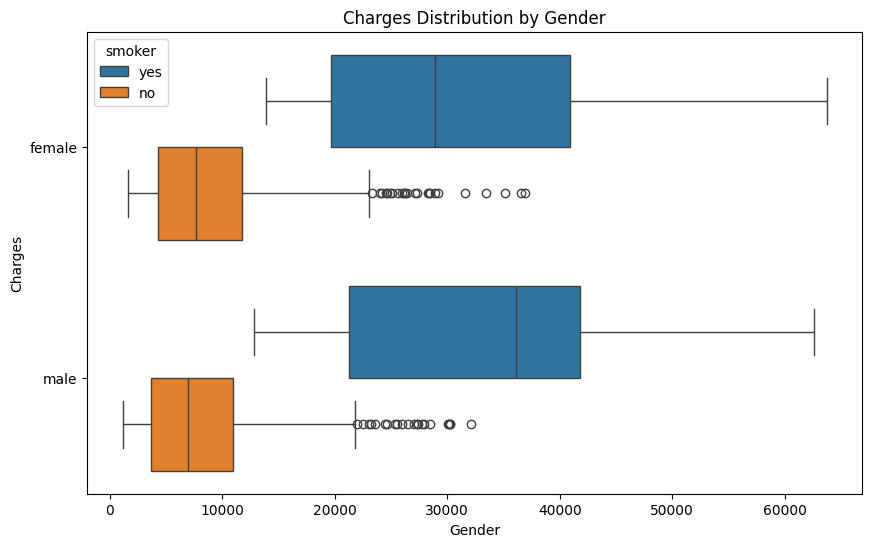

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='sex', x='charges', hue='smoker', data=df)
plt.title('Charges Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

It's noticeable, that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. In addition, there is a negative skewness in the distribution among male smokers.

In [ ]:
df['Age bin'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['under 20', '20-30', '30-40', '40-50', '50-60', '60-70'])
df['Age bin'].isnull().sum()

0

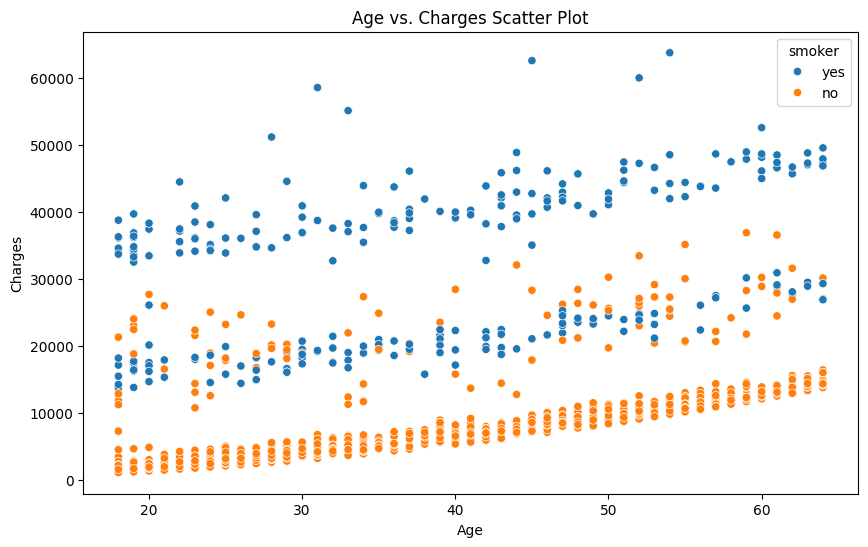

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs. Charges Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Smoking appears to be a cost-increasing factor for all ages.

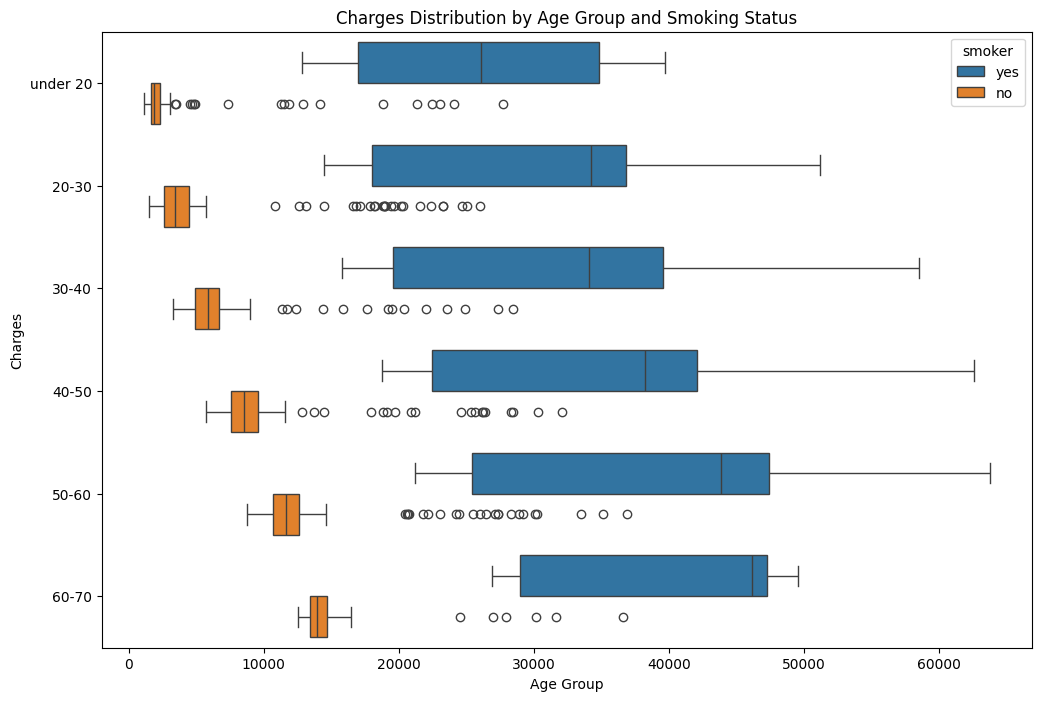

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='Age bin', x='charges', hue='smoker', data=df)
plt.title('Charges Distribution by Age Group and Smoking Status')
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.show()

Smokers have a wider range of health care costs as well. And the distribution is negatively skewed for almost all age categories.

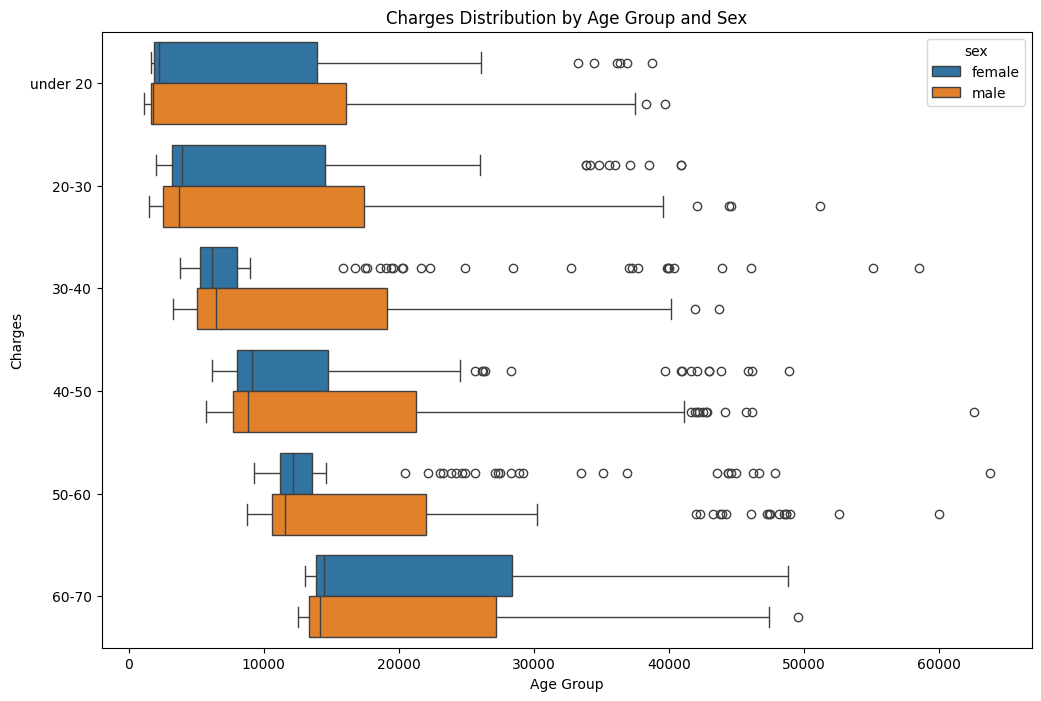

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='Age bin', x='charges', hue='sex', data=df)
plt.title('Charges Distribution by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.show()

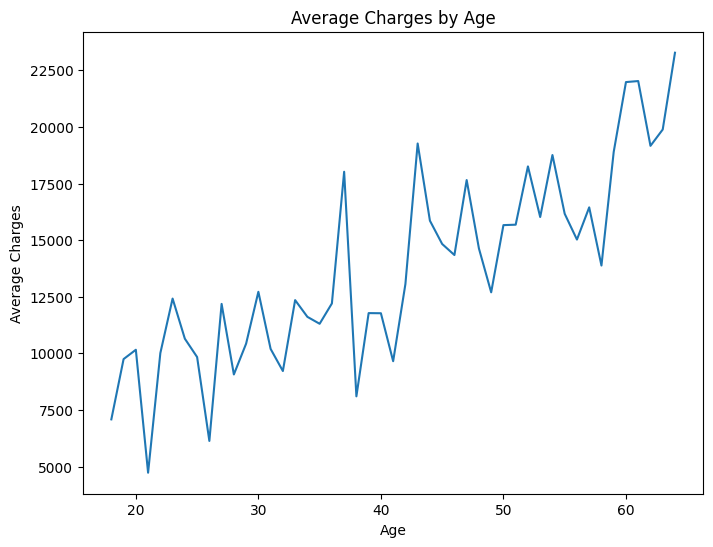

In [ ]:
# Average charges by age
avg_charges_by_age = df.groupby('age')['charges'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

### BMI categories for adults
BMI is a calculation of a body person's weight (in kilograms) divided by the square of their height (in meters). For adults 20 and older, BMI categories are based on a person's BMI regardless of age, sex, or race.

BMI categories for adults 20 and older:

| BMI Category| BMI Range (kg/m2) |
|-------------|-------------------|
| Underweight | Less than 18.5    |
|Healthy Weight|18.5 to less than 25|
|Overweight|25 to less than 30|
|Obesity|30 or greater|
|Class 1 Obesity|30 to less than 35|
|Class 2 Obesity|35 to less than 40|
|Class 3 Obesity|40 or greater|

In [ ]:
print(df['bmi'].min())
print(df['bmi'].max())

15.96
53.13


In [ ]:
df['bmi_bin'] = pd.cut(df['bmi'], bins=[15, 18.5, 25, 30, 35, 40, 55], labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity Class 1', 'Obesity Class 2', 'Obesity Class 3'])
df['bmi_bin'].isnull().sum()

0

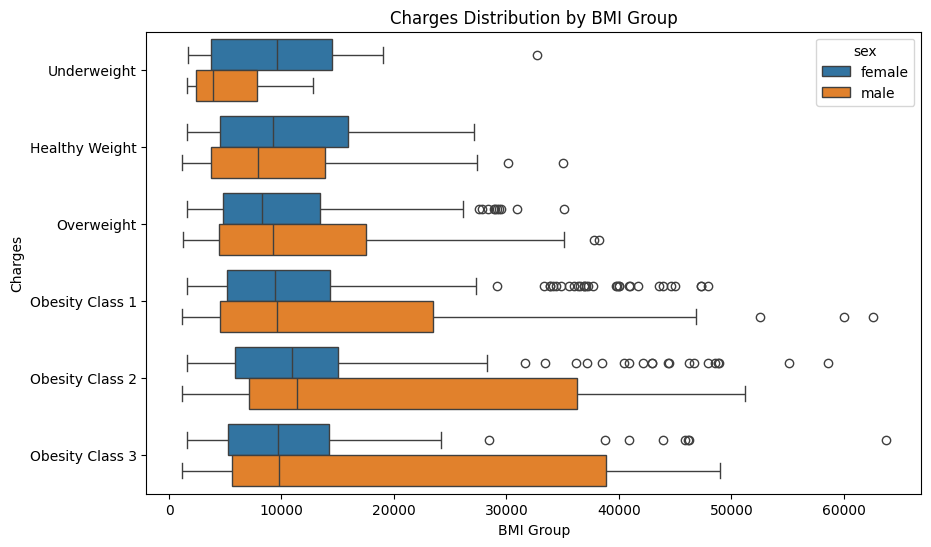

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='charges', y='bmi_bin', hue='sex', data=df)
plt.title('Charges Distribution by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.show()

There is no significant difference in costs between men and women who are not obese. But if a person is obese, health care costs rise faster for men than for women.

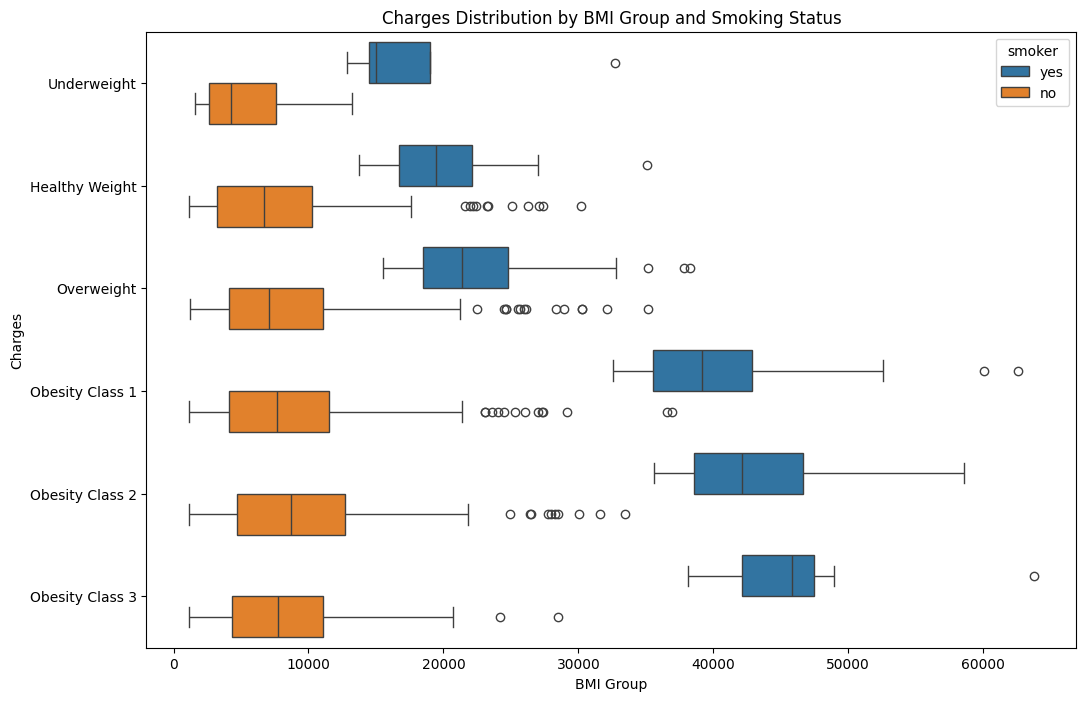

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='bmi_bin', x='charges', hue='smoker', data=df)
plt.title('Charges Distribution by BMI Group and Smoking Status')
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.show()

This plot confirms the earlier suggestion that smoking is a strong factor influencing spending. Futhermore, smoking along with obesity significantly increases costs.

Text(0.5, 1.0, 'Charges Distribution by Number of children')

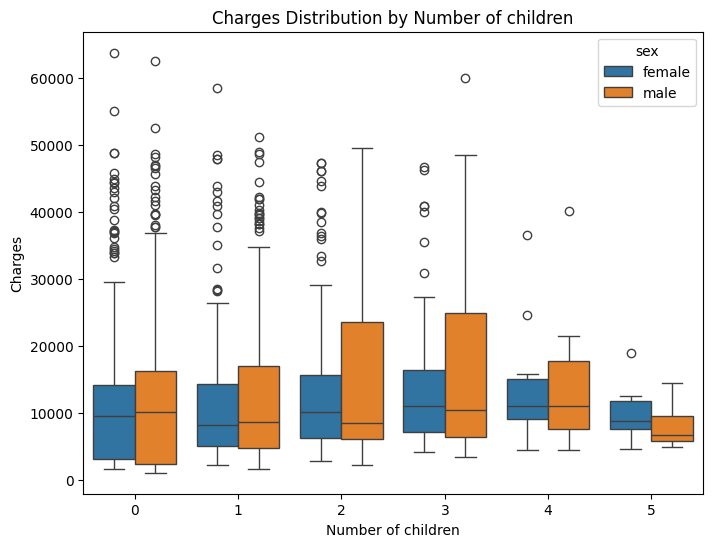

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='children', hue='sex', y='charges')
plt.xlabel('Number of children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of children')

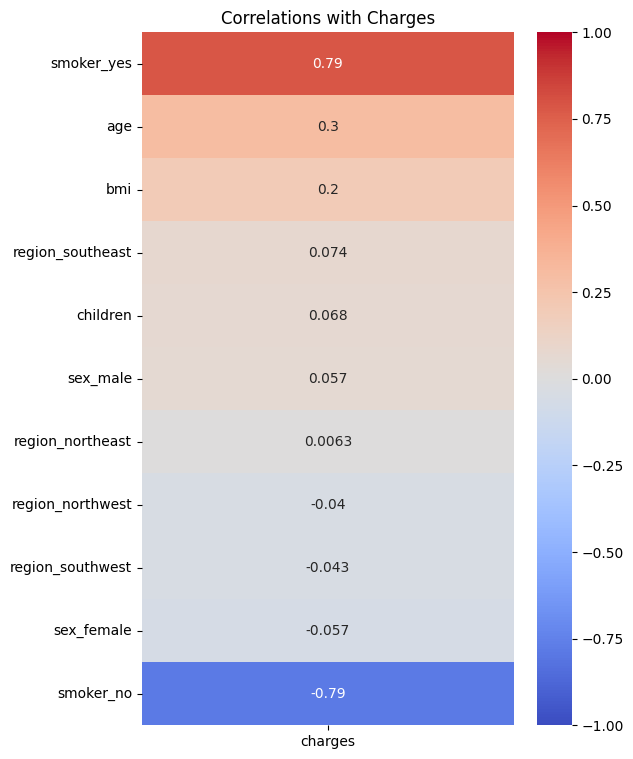

In [ ]:
correlations = df_num.corr()['charges'].sort_values(ascending=False).drop('charges')

# Create a heatmap
plt.figure(figsize=(6, 9))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations with Charges')
plt.show()


Once again, the smoking factor shows a strong correlation with the cost of treatment. The opposite poles of this plot are the smokers and non-smokers.

### Selecting an optimal regression model for predicting target variable

The goal is to evaluate various machine learning models, compare their performance, and determine which model best generalizes to unseen data.

Models Considered:
1. Linear Regression:

   Linear regression serves as a baseline model due to its simplicity and interpretability. It assumes a linear relationship between the features and the target, making it a good starting point for any regression task.

2. Random Forest Regressor:

  Random Forest is an ensemble model that combines the predictions of multiple decision trees, each trained on different parts of the data. This model is chosen for its ability to capture complex, non-linear relationships while being robust to overfitting, thanks to its ensemble nature.
3. Support Vector Regressor (SVR):

  RSVR is included to explore how a model that seeks to fit the data within a margin (instead of minimizing the error directly) performs on our dataset. It’s particularly useful for datasets with many features and non-linear relationships.
4. Decision Tree Regressor:

  Decision Trees are simple yet powerful models that can capture non-linear relationships. However, they are prone to overfitting, making them a good candidate for comparison with more sophisticated models like Random Forest.

Each model represents a different approach to regression, from simple linear models to complex ensemble methods. By comparing these, we can identify which approach works best for our specific dataset

In [ ]:
df_num['charges'] = np.log(df_num['charges'])

In [ ]:
X = df_num.drop(columns=['charges'])
y = df_num['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy = lr.score(X_test,y_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))
print('Accuracy = '+ str(accuracy))

MSE train data: 0.202, MSE test data: 0.176
R2 train data: 0.757, R2 test data: 0.805
Accuracy = 0.8047311493462986


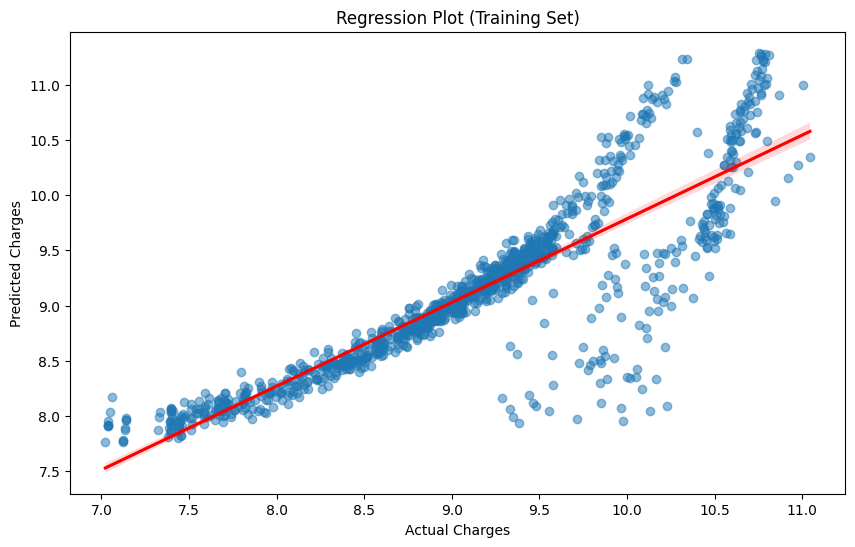

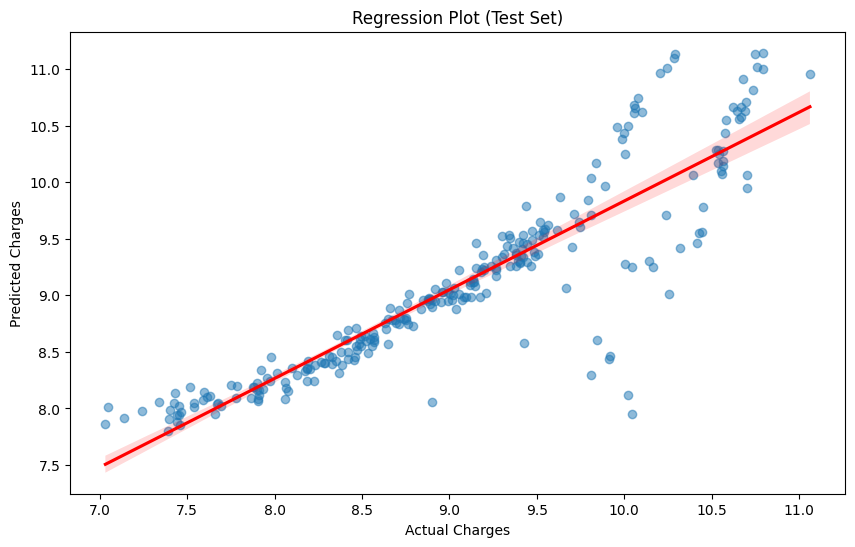

In [ ]:
# Regression plot for the training set
plt.figure(figsize=(10, 6))
sns.regplot(x=y_train, y=y_train_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Training Set)')
plt.show()

# Regression plot for the test set
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Test Set)')
plt.show()

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'friedman_mse',
                              random_state = 1,
                              max_depth=5)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))
accuracy = forest.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

MSE train data: 0.119, MSE test data: 0.122
R2 train data: 0.857, R2 test data: 0.864
Accuracy = 0.8641979543345306


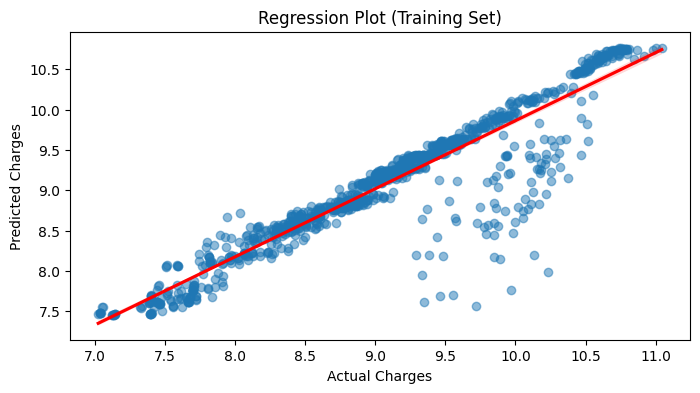

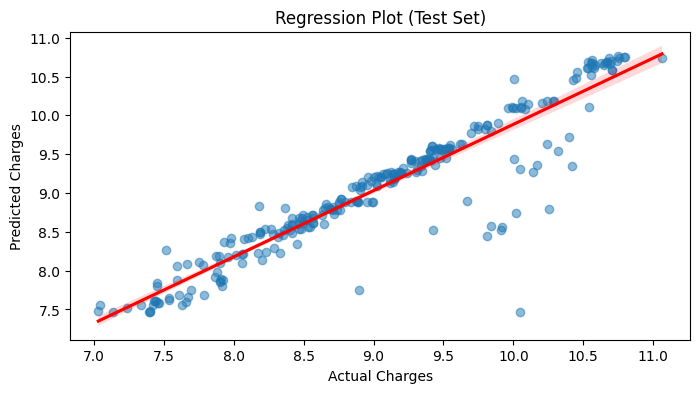

In [ ]:
# Regression plot for the training set
plt.figure(figsize=(8, 4))
sns.regplot(x=y_train, y=forest_train_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Training Set)')
plt.show()

# Regression plot for the test set
plt.figure(figsize=(8, 4))
sns.regplot(x=y_test, y=forest_test_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Test Set)')
plt.show()

### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

# Create SVR model
svr = SVR(kernel='linear')  # You can experiment with different kernels

# Fit the model
svr.fit(X_train, y_train)

# Make predictions
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

# Evaluate the model
print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, svr_train_pred),
    mean_squared_error(y_test, svr_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, svr_train_pred),
    r2_score(y_test, svr_test_pred)))
accuracy = svr.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

MSE train data: 0.541, MSE test data: 0.462
R2 train data: 0.348, R2 test data: 0.486
Accuracy = 0.48570685165936567


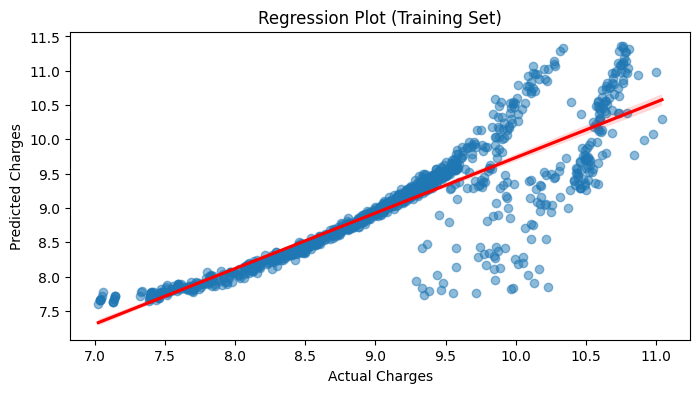

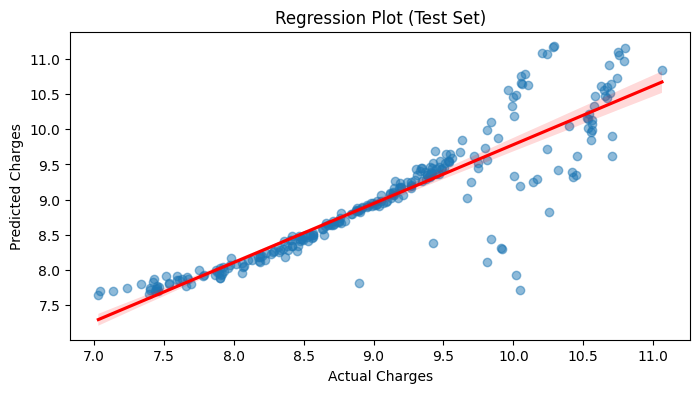

In [ ]:
# Regression plot for the training set
plt.figure(figsize=(8, 4))
sns.regplot(x=y_train, y=svr_train_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Training Set)')
plt.show()

# Regression plot for the test set
plt.figure(figsize=(8, 4))
sns.regplot(x=y_test, y=svr_test_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Test Set)')
plt.show()

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regression model
tree = DecisionTreeRegressor(random_state=0)

# Fit the model
tree.fit(X_train, y_train)

# Make predictions
tree_train_pred = tree.predict(X_train)
tree_test_pred = tree.predict(X_test)

# Evaluate the model
print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, tree_train_pred),
    mean_squared_error(y_test, tree_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, tree_train_pred),
    r2_score(y_test, tree_test_pred)))
accuracy = tree.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

MSE train data: 0.005, MSE test data: 0.228
R2 train data: 0.994, R2 test data: 0.746
Accuracy = 0.7461904895756843


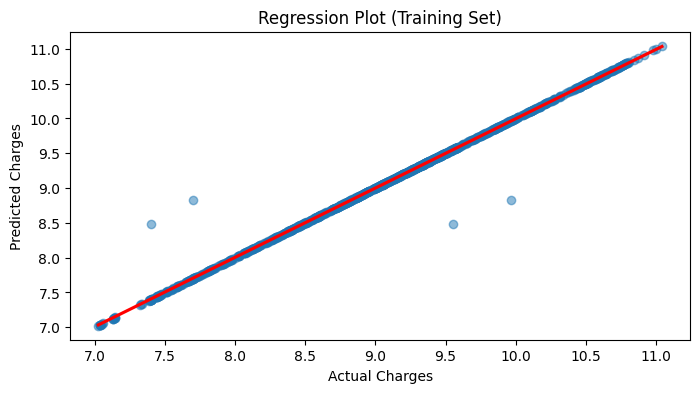

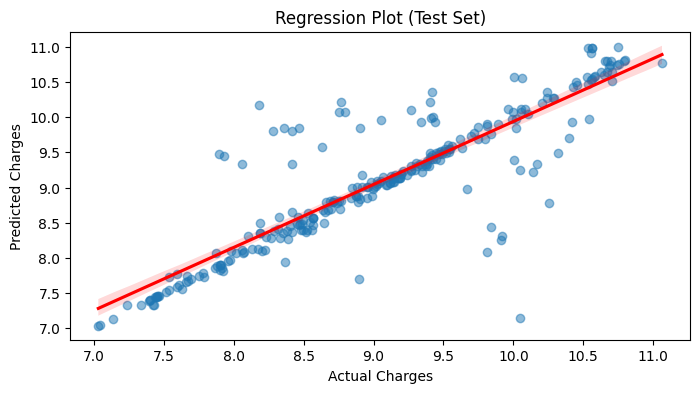

In [ ]:
# Regression plot for the training set
plt.figure(figsize=(8, 4))
sns.regplot(x=y_train, y=tree_train_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Training Set)')
plt.show()

# Regression plot for the test set
plt.figure(figsize=(8, 4))
sns.regplot(x=y_test, y=tree_test_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Plot (Test Set)')
plt.show()

## Comparing the results


| Model | MSE (Train) | MSE (Test) | R2 (Train) | R2 (Test) | Accuracy |
|-------|-------------|------------|------------|-----------|----------|
| Linear Regression | 0.202 | 0.176 | 0.757 | 0.805 | 0.805 |
|Random Forest Regressor|0.119 | 0.122| 0.857 | 0.864| 0.864|
|Support Vector Regressor (SVR)| 0.219 | 0.181 | 0.736 | 0.799 | 0.799 |
|Decision Tree Regressor | 0.005 | 0.228| 0.994| 0.746 |  0.746 |



As can be seen, Random forest regression model has the lowest MSE and highest R2 scores on both the training and test datasets, indicating that it makes accurate predictions and captures a large portion of the variance in the data. The model generalizes well to unseen data, as shown by the small difference between training and test performance, meaning it is less likely to overfit compared to the Decision Tree Regressor.

The random forest regressor is the best choice among the models applied. The model performs well on unseen data and provides reliable predictions. Let's try to improve this model with Grid Search CV and Random Search CV.

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the model
forest = RandomForestRegressor(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best MSE (negated) found by GridSearchCV:")
print(-grid_search.best_score_)

# Get the best model
best_grid_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_grid_model.predict(X_test)
print('MSE test data: %.3f' % mean_squared_error(y_test, y_test_pred))
print('R2 test data: %.3f' % r2_score(y_test, y_test_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found by GridSearchCV:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE (negated) found by GridSearchCV:
0.15047097400003773
MSE test data: 0.125
R2 test data: 0.861


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the model
forest = RandomForestRegressor(random_state=1)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error',
                                   random_state=1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print("Best MSE (negated) found by RandomizedSearchCV:")
print(-random_search.best_score_)

# Get the best model
best_random_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_random_model.predict(X_test)
print('MSE test data: %.3f' % mean_squared_error(y_test, y_test_pred))
print('R2 test data: %.3f' % r2_score(y_test, y_test_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by RandomizedSearchCV:
{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 187}
Best MSE (negated) found by RandomizedSearchCV:
0.1504896770397365
MSE test data: 0.125
R2 test data: 0.861


All three models have very similar MSE and R2 scores on the test data. The simple RandomForestRegressor has an MSE of 0.122 and an R2 of 0.864. Both GridSearchCV and RandomizedSearchCV found similar hyperparameters that improved the generalization of the model, although they resulted in a slightly higher MSE compared to the simple model. Since computational efficiency and simplicity are the advanteges of the simple RandomForestRegressor, it might be the best approach.